In [49]:
from sklearn import datasets
from sklearn.manifold import TSNE
import time
import umap
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from scipy.stats import multivariate_normal

## Problem 16.15

In [30]:
bc_data = datasets.load_breast_cancer().data
bc_targets = datasets.load_breast_cancer().target
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
input_dim = 784 #28*28
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train/255
X_test = X_test/255

In [14]:
x_embedded_bc = TSNE().fit_transform(bc_data)

In [16]:
x_embedded_bc.shape

(569, 2)

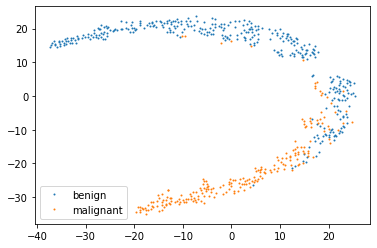

In [28]:
plt.plot(x_embedded_bc[:,0][bc_targets==1], x_embedded_bc[:,1][bc_targets==1], 'o', markersize=1, label="benign")
plt.plot(x_embedded_bc[:,0][bc_targets==0], x_embedded_bc[:,1][bc_targets==0], 'o', markersize=1, label="malignant")

plt.legend()
plt.show()

In [31]:
x_emb_mnist = TSNE().fit_transform(X_train)

In [33]:
x_emb_mnist.shape

(60000, 2)

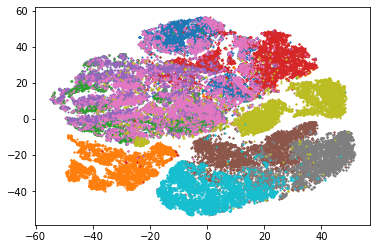

In [36]:
for i in np.unique(y_train):
    plt.plot(x_emb_mnist[:,0][y_train == i], x_emb_mnist[:,1][y_train == i], 'o', markersize=1)

plt.show()

In [35]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Problem 16.16

### i

In [38]:
perplexity = [2, 5, 10, 30, 50, 100, 500]

In [40]:
label_0 = np.random.multivariate_normal((0,0,0), np.eye(3), size=50)
label_1 = np.random.multivariate_normal((3,3,3), np.eye(3), size=50)

embed_0 = []
embed_1 = []

for p in perplexity:
    embed_0.append(TSNE(n_components=2, perplexity=p).fit_transform(label_0))
    embed_1.append(TSNE(n_components=2, perplexity=p).fit_transform(label_1))


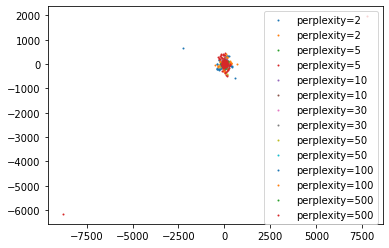

In [41]:
for i in range(len(perplexity)):
    plt.plot(embed_0[i][:,0], embed_0[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    plt.plot(embed_1[i][:,0], embed_1[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    
plt.legend()
plt.show()

### ii

In [42]:
label_0 = np.random.multivariate_normal((0,0,0), np.eye(3), size=50)
label_1 = np.random.multivariate_normal((2,2,2), np.eye(3), size=50)
label_2 = np.random.multivariate_normal((-1,2,1), np.eye(3), size=50)

embed_0 = []
embed_1 = []
embed_2 = []

for p in perplexity:
    embed_0.append(TSNE(n_components=2, perplexity=p).fit_transform(label_0))
    embed_1.append(TSNE(n_components=2, perplexity=p).fit_transform(label_1))    
    embed_2.append(TSNE(n_components=2, perplexity=p).fit_transform(label_2))

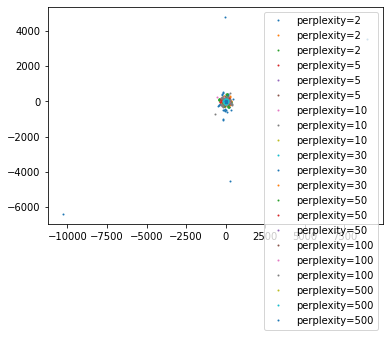

In [43]:
for i in range(len(perplexity)):
    plt.plot(embed_0[i][:,0], embed_0[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    plt.plot(embed_1[i][:,0], embed_1[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    plt.plot(embed_2[i][:,0], embed_2[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    
plt.legend()
plt.show()

### iii

In [44]:
covar = np.array([[10, 0], [0, 0.1]])
label_0 = np.random.multivariate_normal((0,0), covar, size=50)
label_1 = np.random.multivariate_normal((2,2), covar, size=50)

embed_0 = []
embed_1 = []

for p in perplexity:
    embed_0.append(TSNE(n_components=2, perplexity=p).fit_transform(label_0))
    embed_1.append(TSNE(n_components=2, perplexity=p).fit_transform(label_1))

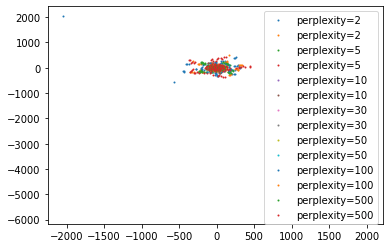

In [45]:
for i in range(len(perplexity)):
    plt.plot(embed_0[i][:,0], embed_0[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    plt.plot(embed_1[i][:,0], embed_1[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    
plt.legend()
plt.show()

## iv

In [46]:
label_0 = np.random.multivariate_normal((0,0,0), np.eye(3), size=100)

embed_0 = []

for p in perplexity:
    embed_0.append(TSNE(n_components=2, perplexity=p).fit_transform(label_0))

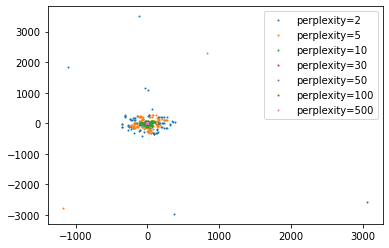

In [47]:
for i in range(len(perplexity)):
    plt.plot(embed_0[i][:,0], embed_0[i][:,1], 'o', markersize=1, label='perplexity='+ str(perplexity[i]))
    
plt.legend()
plt.show()

## Problem 16.18 i-iii

In [51]:
## Breast Cancer
t_sne_start = time.time()
x_embed_bc = TSNE().fit_transform(bc_data)
t_sne_end = time.time()

umap_start = time.time()
x_embed_bc = umap.UMAP().fit_transform(bc_data)
umap_end = time.time()

bc_tsne_time = t_sne_end - t_sne_start

bc_umap_time = umap_end = umap_start

## Iris
iris_data = datasets.load_iris().data

t_sne_start = time.time()
x_embed_iris = TSNE().fit_transform(iris_data)
t_sne_end = time.time()

umap_start = time.time()
x_embed_iris = umap.UMAP().fit_transform(iris_data)
umap_end = time.time()

iris_tsne_time = t_sne_end - t_sne_start

iris_umap_time = umap_end = umap_start

## Fashion_MNIST

t_sne_start = time.time()
x_embed_fash = TSNE().fit_transform(X_train)
t_sne_end = time.time()

umap_start = time.time()
x_embed_fash = umap.UMAP().fit_transform(X_train)
umap_end = time.time()

fash_tsne_time = t_sne_end - t_sne_start

fash_umap_time = umap_end = umap_start

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [52]:
print('Breast Cancer times:')
print('t-SNE: ', bc_tsne_time)
print("UMAP: ", bc_umap_time)

print('Iris times:')
print('t-SNE: ', iris_tsne_time)
print("UMAP: ", iris_umap_time)

print('Fashion_MNIST times:')
print('t-SNE: ', fash_tsne_time)
print("UMAP: ", fash_umap_time)

Breast Cancer times:
t-SNE:  3.1860039234161377
UMAP:  1647409277.949198
Iris times:
t-SNE:  1.4148280620574951
UMAP:  1647409290.722569
Fashion_MNIST times:
t-SNE:  733.3560709953308
UMAP:  1647410027.146118
